# Capstone Project 

## Find the best place to open a new restaurant called "KHANNECTION"

#### This is a feasibility project conducted to understand whether Dallas, Texas would be a good location to open up a new restaurant.

# 1. Introduction


## A. Problem Statement

The city chosen for this analysis is Dallas, TX. With an estimated 2019 population of 1,343,573, it is the ninth most-populous city in the U.S. and the third-largest in Texas. Over 41 colleges and universities are located within its metropolitan area, which is the most of any metropolitan area in Texas. The city has a population from a myriad of ethnic and religious backgrounds and one of the largest LGBT communities in the U.S.

The city of Dallas is home to many areas, neighborhoods, and communities. Dallas can be divided into several geographical areas which include larger geographical sections of territory including many subdivisions or neighborhoods, forming macroneighborhoods namely;

* Bishop Arts District
* Casa Linda
* Casa View
* Cedars, The
* Deep Ellum
* Design District
* Downtown
*Exposition Park
*Fair Park
*Kessler Park
*Knox-Henderson
*Lakewood
*Lake Highlands
*Lower Greenville
*"M" Streets
*Oak Cliff
*Oak Lawn
*Park Cities
*Pleasant Grove
*Preston Hollow
*Southwestern Medical District
*Trinity Groves
*Turtle Creek
*Uptown
*Victory Park
*West End

# 2. Data Collection


##  A. Data Sources

Demographic data can be obtained via "https://neighborhoods.dmagazine.com/". 



## B. Data Usage

Dataframes will be created using pandas library in python to merge the information found in the above to data sets. Folium library will be used to visualize these on a geographical map followed by K_means clustering to identify similarity of neighborhoods. FOURSQUARE API will be used to determine local venues based on the clusters. Once the data is available, this can allow us to visualize whether a certain type of food is over or undersaturated. Meaning, does a market exist for the type of food we would like to introuce in Dallas area. 




In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install geopy
!pip install folium
!pip install geocoder
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.



Defaulting to user installation because normal site-packages is not writeable

You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
#Importing Libraries

import lxml.html as lh
import requests 
import pandas as pd 
import numpy as np 
import random
from geopy.geocoders import Nominatim 
from itertools import cycle, islice
import geocoder
import urllib3
urllib3.disable_warnings()

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
from IPython.display import display_html

    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


import folium
from bs4 import BeautifulSoup as soup
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Libraries imported.')

Libraries imported.


In [3]:
url = 'https://neighborhoods.dmagazine.com'

In [4]:
#Create a handle, page, to handle the contents of the website
page = requests.get(url)

#Store the contents of the website under doc
doc = lh.fromstring(page.content)

#Parse data that are stored between <tr>..</tr> of the site's HTML code
tr_elements = doc.xpath('//tr')

#### Pulling data from the webpages and storing into pandas dataset

In [5]:
tr_elements = doc.xpath('//tr')

#Create empty list
col=[]
i=0

#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))

1:"Neighborhood"
2:"Population"
3:"Area (Square Miles)"
4:"Pop. Density (Per Sq. Mile)"
5:"Median Age"
6:"Age 18+"
7:"Household Income"
8:"Median Home Value"
9:"% Owner-Occupied"
10:"Avg. Commute in Minutes"


### Using For-loop to create and add table contents from the URL into pandas dataset

In [6]:
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=10:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [7]:
[len(C) for (title,C) in col]

[57, 57, 57, 57, 57, 57, 57, 57, 57, 57]

In [8]:
data={title:column for (title,column) in col}

df=pd.DataFrame(data)
df.drop(df.tail(1).index,inplace=True)
df

,Neighborhood,Population,Area (Square Miles),Pop. Density (Per Sq. Mile),Median Age,Age 18+,Household Income,Median Home Value,% Owner-Occupied,Avg. Commute in Minutes
0,Bent Tree,"10,215",2.59,3944.0,47.8,86.2%,"$79,127","$466,614",55.7%,23.0
1,Bluffview,"4,617",1.43,"3,228.7",38.9,75.0%,"$64,001","$624,068",61.9%,22.0
2,Casa Linda,"4,175",1.46,2859.6,46.3,80.8%,"$85,488","$234,502",83.3%,29.0
3,Central Dallas,"148,318",28.7,"5,167.9",34.4,83.4%,"$53,983","$247,887",25.5%,24.0
4,Deep Ellum - Expo Park,"2,621",0.63,"4,160.3",34.0,87.9%,"$53,659","$275,131",6.3%,23.0
5,Design District,"1,932",0.97,"1,985.6",33.2,96.5%,"$80,263","$248,000",2.0%,20.0
6,Devonshire,"1,542",0.54,"2,860.9",39.8,72.0%,"$158,766","$858,317",83.1%,20.0
7,Downtown,"13,041",2.87,"4,543.9",34.6,92.2%,"$72,224","$337,404",12.2%,24.0
8,East Dallas,"144,008",29.80,"4,832.5",35.8,74.3%,"$55,783","$231,335",54.7%,29.0
9,Eastwood,809,0.26,"3,111.5",49.1,81.7%,"$92,912","$262,820",94.7%,30.0


#### Using Geocode to obtain latitude & longitude data for Dallas, TX neighborhoods

In [9]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Dallas, Texas'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

### Creating separate dataframe for neighborhood coordinates.

In [10]:
coords = [ get_latlng(neighborhood) for neighborhood in df["Neighborhood"].tolist() ]
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])
df['Latitude'] = df_coords['Latitude']
df['Longitude'] = df_coords['Longitude']
Dallas = df[['Neighborhood','Latitude','Longitude']]
Dallas.head()

,Neighborhood,Latitude,Longitude
0,Bent Tree,32.980084,-96.814189
1,Bluffview,32.856870,-96.829240
2,Casa Linda,32.832458,-96.700652
3,Central Dallas,32.799260,-96.792750
4,Deep Ellum - Expo Park,32.784070,-96.782800


### Using folium, displaying neighborhoods on a map

In [11]:
latitude = Dallas['Latitude']
longitude = Dallas['Longitude']

# create map of Dallas using latitude and longitude values
Dallas_map = folium.Map(location= [32.7767, -96.7970], zoom_start=10)

# add markers to map
for lat, lng, label in zip(latitude, longitude, Dallas['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Dallas_map)
    
Dallas_map

### Foursquare API to pull restaurant(s) information

In [12]:
CLIENT_ID = 'QSF5WACESWLRA5CSZOWHR13UQIZ4QOLC5OEAVV1DGUKELGAZ' # your Foursquare ID
CLIENT_SECRET = 'BNN33BKKFYPRLKJJ1XWSBQWLZ55Z5BITQWAWUE4J12HOJUEH' # your Foursquare Secret
VERSION = '20201023'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: QSF5WACESWLRA5CSZOWHR13UQIZ4QOLC5OEAVV1DGUKELGAZ
CLIENT_SECRET:BNN33BKKFYPRLKJJ1XWSBQWLZ55Z5BITQWAWUE4J12HOJUEH


#### Defining a new function to obtain venues close to each neighborhood coordinate(s)

In [13]:
def DallasRestaurants(names, latitudes, longitudes, radius):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&section=food&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        resp = requests.get(url).json()["response"]
        
        if "groups" in resp:
            results = resp['groups'][0]['items']
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    Dallas_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    Dallas_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(Dallas_venues)

In [14]:
Dallas_restaurants = DallasRestaurants(names=Dallas['Neighborhood'],
                                         latitudes=Dallas['Latitude'],
                                         longitudes=Dallas['Longitude'],
                                         radius=4000)

In [15]:
Dallas_restaurants

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bent Tree,32.980084,-96.814189,Deli News,32.983000,-96.803256,Deli / Bodega
1,Bent Tree,32.980084,-96.814189,Liberty Burger,32.969000,-96.820290,Burger Joint
2,Bent Tree,32.980084,-96.814189,Lekka,32.991936,-96.800345,Mediterranean Restaurant
3,Bent Tree,32.980084,-96.814189,Crossroads Diner,32.983020,-96.800898,Breakfast Spot
4,Bent Tree,32.980084,-96.814189,Uncle Julio's,32.969441,-96.820694,Mexican Restaurant
...,...,...,...,...,...,...,...
5171,Glen Abbey,32.970612,-96.813169,Angelo and Vito's,32.997320,-96.831246,Pizza Place
5172,Glen Abbey,32.970612,-96.813169,Joe's Italian Café,32.953541,-96.846929,Italian Restaurant
5173,Glen Abbey,32.970612,-96.813169,Little Greek Fresh Grill,32.953548,-96.817838,Comfort Food Restaurant
5174,Glen Abbey,32.970612,-96.813169,Carrabba's Italian Grill,32.989878,-96.828024,Italian Restaurant


Identifying unique categories of venues across all neighborhoods; such as "Pizza", "American" etc.

In [16]:
(len(Dallas_restaurants['Venue Category'].unique()))

76

Using One-hot encoding to develop a dataframe to show counts of venue categories shown in each column, available for each neighborhood.

In [17]:
# one hot encoding
kl_onehot = pd.get_dummies(Dallas_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
kl_onehot['Neighborhoods'] = Dallas_restaurants['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [kl_onehot.columns[-1]] + list(kl_onehot.columns[:-1])
kl_onehot = kl_onehot[fixed_columns]

print(kl_onehot.shape)
kl_onehot.head(20)

(5176, 77)


,Neighborhoods,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,...,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Bent Tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bent Tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bent Tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bent Tree,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Bent Tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Bent Tree,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Bent Tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Bent Tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Bent Tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Bent Tree,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


#### Grouping data by neighborhood to understand total different types of venues

In [18]:
Dallas_grouped = kl_onehot.groupby(["Neighborhoods"]).sum().reset_index()

Dallas_grouped

,Neighborhoods,African Restaurant,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,...,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint
0,Bent Tree,1,7,0,0,0,2,0,2,2,...,2,0,1,0,4,0,0,1,0,2
1,Bluffview,1,10,0,2,1,7,0,0,2,...,1,0,0,0,1,0,0,0,0,1
2,Casa Linda,0,6,1,3,0,5,0,0,2,...,4,0,0,2,0,0,0,0,1,2
3,Casa View,0,9,2,2,0,5,0,0,0,...,3,0,0,2,0,0,0,0,1,2
4,Central Dallas,0,13,1,1,0,1,0,1,2,...,4,0,1,1,5,0,0,1,2,0
5,Deep Ellum - Expo Park,0,13,1,2,0,1,1,1,1,...,4,0,1,2,4,1,0,0,1,0
6,Design District,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Devonshire,0,11,0,3,1,9,0,0,2,...,2,0,0,0,1,0,0,0,1,0
8,Downtown,0,14,1,1,0,1,1,1,1,...,2,0,1,2,3,1,0,0,1,0
9,East Dallas,0,11,1,2,0,2,1,1,1,...,5,0,1,1,4,0,0,1,3,2


##### Defining function to identify most common venues in Dallas,TX

In [19]:
def most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [20]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Dallas_restaurants_sorted = pd.DataFrame(columns=columns)
Dallas_restaurants_sorted['Neighborhoods'] = Dallas_grouped['Neighborhoods']

for ind in np.arange(Dallas_grouped.shape[0]):
    Dallas_restaurants_sorted.iloc[ind, 1:] = most_common_venues(Dallas_grouped.iloc[ind, :], num_top_venues)

In [21]:
Dallas_restaurants_sorted

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bent Tree,Mexican Restaurant,Sushi Restaurant,American Restaurant,Fast Food Restaurant,Steakhouse,Sandwich Place,Seafood Restaurant,Italian Restaurant,Burger Joint,Thai Restaurant
1,Bluffview,Mexican Restaurant,American Restaurant,Bakery,Seafood Restaurant,Fast Food Restaurant,Burger Joint,Italian Restaurant,New American Restaurant,Sandwich Place,French Restaurant
2,Casa Linda,Pizza Place,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,American Restaurant,Bakery,Taco Place,Chinese Restaurant,Fried Chicken Joint,Donut Shop
3,Casa View,Fast Food Restaurant,Mexican Restaurant,American Restaurant,Pizza Place,Sandwich Place,Bakery,Burger Joint,Donut Shop,Chinese Restaurant,Restaurant
4,Central Dallas,American Restaurant,New American Restaurant,Mexican Restaurant,Japanese Restaurant,Burger Joint,Seafood Restaurant,Thai Restaurant,Steakhouse,Pizza Place,Taco Place
5,Deep Ellum - Expo Park,American Restaurant,New American Restaurant,Mexican Restaurant,Burger Joint,Steakhouse,Japanese Restaurant,Pizza Place,Restaurant,Seafood Restaurant,Taco Place
6,Design District,Café,Diner,German Restaurant,Gastropub,Bakery,Food,Wings Joint,Fondue Restaurant,Donut Shop,Dumpling Restaurant
7,Devonshire,Mexican Restaurant,American Restaurant,Bakery,Seafood Restaurant,Fast Food Restaurant,New American Restaurant,Italian Restaurant,Burger Joint,Sandwich Place,French Restaurant
8,Downtown,American Restaurant,Mexican Restaurant,Burger Joint,New American Restaurant,Steakhouse,Seafood Restaurant,Pizza Place,Japanese Restaurant,Thai Restaurant,Restaurant
9,East Dallas,American Restaurant,Burger Joint,New American Restaurant,Seafood Restaurant,Mexican Restaurant,Pizza Place,Japanese Restaurant,Taco Place,Steakhouse,Thai Restaurant


## C. Clustering

Using Elbow Method, optimum K value is identified for this dataset

c:\program files\python38\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


<bound method Visualizer.poof of KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)>

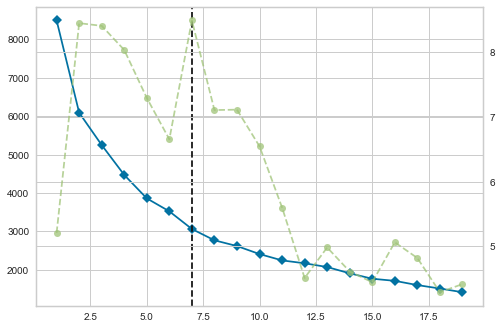

In [22]:
Dallas_restaurant_cluster = Dallas_grouped.drop('Neighborhoods', 1)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))

visualizer.fit(Dallas_restaurant_cluster)        # Fit the data to the visualizer
visualizer.poof

In [23]:
# set number of clusters
k = 5

Dallas_grouped_cluster = Dallas_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(Dallas_grouped_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 0, 0, 3, 3, 4, 1, 3, 3])

Cluster labels are created in the dataset to plot them on the map

In [24]:
Dallas_restaurants_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [25]:
Dallas_merged = Dallas.join(Dallas_restaurants_sorted.set_index('Neighborhoods'), on='Neighborhood')
Dallas_merged['Cluster Labels'] = Dallas_merged['Cluster Labels'].fillna(0)
Dallas_merged['Cluster Labels'] = Dallas_merged['Cluster Labels'].astype(int)
Dallas_merged.head() 

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bent Tree,32.980084,-96.814189,1,Mexican Restaurant,Sushi Restaurant,American Restaurant,Fast Food Restaurant,Steakhouse,Sandwich Place,Seafood Restaurant,Italian Restaurant,Burger Joint,Thai Restaurant
1,Bluffview,32.856870,-96.829240,1,Mexican Restaurant,American Restaurant,Bakery,Seafood Restaurant,Fast Food Restaurant,Burger Joint,Italian Restaurant,New American Restaurant,Sandwich Place,French Restaurant
2,Casa Linda,32.832458,-96.700652,0,Pizza Place,Fast Food Restaurant,Mexican Restaurant,Sandwich Place,American Restaurant,Bakery,Taco Place,Chinese Restaurant,Fried Chicken Joint,Donut Shop
3,Central Dallas,32.799260,-96.792750,3,American Restaurant,New American Restaurant,Mexican Restaurant,Japanese Restaurant,Burger Joint,Seafood Restaurant,Thai Restaurant,Steakhouse,Pizza Place,Taco Place
4,Deep Ellum - Expo Park,32.784070,-96.782800,3,American Restaurant,New American Restaurant,Mexican Restaurant,Burger Joint,Steakhouse,Japanese Restaurant,Pizza Place,Restaurant,Seafood Restaurant,Taco Place


In [26]:
# create map
map_clusters = folium.Map(location=[32.7767, -96.7970],zoom_start=5)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(Dallas_merged['Latitude'], Dallas_merged['Longitude'], Dallas_merged['Neighborhood'], Dallas_merged['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# 3. Conclusion

 As represented in the above maps, best place to open a new restaurant based on location data available would be the SOUTH side of Dallas city. This is because there isn't a high concentration of restaurants available there and would make a suitable place to inaugurate a new restaurant. 
 
As with any study, there are limitations to this analysis. One of the biggest missing component is the Socio-Economic-Status (SES) of the neighborhoods. That would deterime whether if would make business sense to operate a high end restaurant in areas where average income is less than $50,000. 
